In [1]:
# Aumento de datos
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Creamos un dataset generador
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range= 10,
    width_shift_range=0.15,
    height_shift_range=0.15,
    shear_range=5,
    zoom_range=[0.7, 1.3],
    validation_split=0.2,
)

data_gen_entrenamiento = datagen.flow_from_directory("dataset3", target_size=(224, 224), batch_size=32, shuffle=True, subset='training')

data_gen_pruebas = datagen.flow_from_directory("dataset3", target_size=(224, 224), batch_size=32, shuffle=True, subset='validation')

Found 835 images belonging to 2 classes.
Found 208 images belonging to 2 classes.


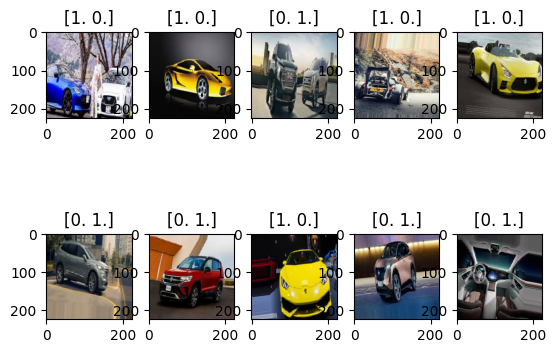

In [13]:
import matplotlib.pyplot as plt

# Mostramos algunas imagenes
for imagen, etiqueta in data_gen_entrenamiento:
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(imagen[i])
        plt.title(etiqueta[i])
    break
plt.show()

In [14]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224, 224, 3))

In [15]:
#Congelamos las capas
mobilenetv2.trainable = False

In [16]:
import tf_keras
modelo = tf_keras.Sequential([
    mobilenetv2,
    tf_keras.layers.Dense(2, activation='softmax')
])

In [17]:
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
EPOCAS = 5
entrenamiento = modelo.fit(data_gen_entrenamiento, epochs=EPOCAS, steps_per_epoch=10,validation_data=data_gen_pruebas, validation_steps=5)

Epoch 1/5



 6/10 [=================>............] - ETA: 2s - loss: 0.6580 - accuracy: 0.6562

c:\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


10/10 [==============================] - 17s 1s/step - loss: 0.6129 - accuracy: 0.6781 - val_loss: 0.5265 - val_accuracy: 0.7500
Epoch 2/5
10/10 [==============================] - 12s 1s/step - loss: 0.4189 - accuracy: 0.8110 - val_loss: 0.4237 - val_accuracy: 0.7917
Epoch 3/5
10/10 [==============================] - 15s 2s/step - loss: 0.3620 - accuracy: 0.8625 - val_loss: 0.3285 - val_accuracy: 0.8472
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 0.3026 - accuracy: 0.8906 - val_loss: 0.3061 - val_accuracy: 0.8750
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 0.2785 - accuracy: 0.8866 - val_loss: 0.3217 - val_accuracy: 0.8264


In [19]:
from PIL import Image
import cv2

def categorizar(ruta):
    img = Image.open(ruta)
    img = img.convert("RGB")
    img = np.array(img).astype(float)/255

    img = cv2.resize(img, (224, 224))
    prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
    return np.argmax(prediccion[0], axis=-1)


In [20]:
ruta = "deportivo.jpg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 1s 1s/step
0


In [21]:
ruta = "deportivo2.jpg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 0s 480ms/step
0


In [22]:
ruta = "suv.jpg"
prediccion = categorizar(ruta)
print(prediccion)

1/1 [==============================] - 1s 530ms/step
1
